<a href="https://colab.research.google.com/github/Elman295/SMS_spam_detection/blob/main/SMS_spam_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import tensorflow as tf
import zipfile 
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
sb.set()

In [3]:
with zipfile.ZipFile("archive (1).zip","r") as file:
  file.extractall("data")

In [8]:
data = os.listdir("data")
data_csv_URL = os.path.join("data", "spam.csv")
data

['spam.csv']

In [10]:
data_csv = pd.read_csv(data_csv_URL, encoding = 'latin-1')
data_csv.head(20)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [11]:
len(data_csv)

5572

In [14]:
data_csv.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [15]:
data_csv["v1"].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

In [16]:
y_raw = data_csv["v1"]
x_raw = data_csv["v2"]
print(y_raw.head(10))
print(x_raw.head(10))

0     ham
1     ham
2    spam
3     ham
4     ham
5    spam
6     ham
7     ham
8    spam
9    spam
Name: v1, dtype: object
0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
5    FreeMsg Hey there darling it's been 3 week's n...
6    Even my brother is not like to speak with me. ...
7    As per your request 'Melle Melle (Oru Minnamin...
8    WINNER!! As a valued network customer you have...
9    Had your mobile 11 months or more? U R entitle...
Name: v2, dtype: object


In [18]:
x_train = x_raw[:int(0.8 * len(data_csv))]
x_test = x_raw[int(0.8*len(data_csv)):]
y_train = y_raw[:int(0.8*len(data_csv))]
y_test = y_raw[int(0.8*len(data_csv)):]


In [19]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

4457
1115
4457
1115


In [22]:
map_data = {
    "spam":0,
    "ham":1
}

y_train_ready=y_train.map(map_data)
y_test_ready=y_test.map(map_data)

In [23]:
y_train_ready

0       1
1       1
2       0
3       1
4       1
       ..
4452    1
4453    1
4454    1
4455    1
4456    1
Name: v1, Length: 4457, dtype: int64

In [24]:
max_token = 10000

vectorization_layer = tf.keras.layers.TextVectorization(
    max_tokens =max_token,
    output_sequence_length = 200
)
vectorization_layer.adapt(x_train)

In [25]:
def vectorized(x,y):
  x = tf.expand_dims(x,-1)
  return vectorization_layer(x),y

In [26]:
x_train_ready, y_train_ready = vectorized(x_train,y_train_ready)
x_test_ready, y_test_ready = vectorized(x_test, y_test_ready)

In [27]:
AYAZ_model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(max_token+1,16),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units = 2, activation  ="softmax")
])

In [29]:
AYAZ_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          160016    
                                                                 
 dropout (Dropout)           (None, None, 16)          0         
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense (Dense)               (None, 2)                 34        
                                                                 
Total params: 160,050
Trainable params: 160,050
Non-trainable params: 0
__________________________________________________

In [30]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam()

In [32]:
AYAZ_model.compile(
    optimizer = optimizer,
    loss = loss,
    metrics = ["accuracy"]
)

In [33]:
history = AYAZ_model.fit(x_train_ready,y_train_ready, epochs = 20)

Epoch 1/20


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


140/140 [==============================] - 1s 4ms/step - loss: 0.5073 - accuracy: 0.8517
Epoch 2/20
140/140 [==============================] - 1s 4ms/step - loss: 0.3826 - accuracy: 0.8649
Epoch 3/20
140/140 [==============================] - 0s 3ms/step - loss: 0.3733 - accuracy: 0.8649
Epoch 4/20
140/140 [==============================] - 0s 3ms/step - loss: 0.3642 - accuracy: 0.8649
Epoch 5/20
140/140 [==============================] - 0s 3ms/step - loss: 0.3539 - accuracy: 0.8649
Epoch 6/20
140/140 [==============================] - 0s 3ms/step - loss: 0.3426 - accuracy: 0.8649
Epoch 7/20
140/140 [==============================] - 0s 3ms/step - loss: 0.3281 - accuracy: 0.8649
Epoch 8/20
140/140 [==============================] - 0s 3ms/step - loss: 0.3123 - accuracy: 0.8649
Epoch 9/20
140/140 [==============================] - 0s 3ms/step - loss: 0.2916 - accuracy: 0.8649
Epoch 10/20
140/140 [==============================] - 0s 3ms/step - loss: 0.2707 - accuracy: 0.8670
Epoch 11/2

In [34]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

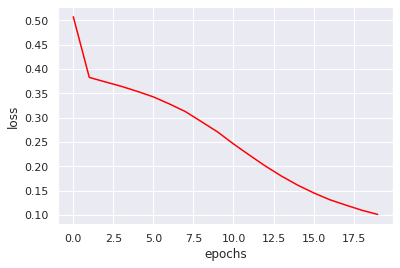

In [41]:
plt.plot(history.history["loss"], color = "red")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.grid(True)
plt.show()

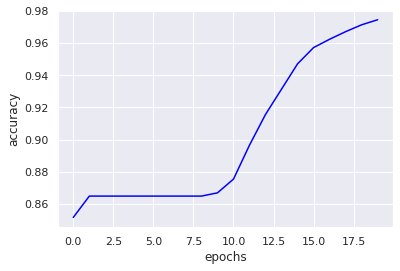

In [42]:
plt.plot(history.history["accuracy"], color = "blue")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.grid(True)
plt.show()

In [43]:
AYAZ_model.evaluate(x_test_ready,y_test_ready)

35/35 [==============================] - 0s 2ms/step - loss: 0.1054 - accuracy: 0.9704


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


[0.10544738173484802, 0.9704036116600037]

In [49]:
AYAZ_model.save("ayaz_sms.h5")